In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [4]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [5]:
!pip install wordcloud


In [29]:
#load data
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [39]:
# sentiment analysis
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    # Handle missing values
    if pd.isna(text):
        return 'Neutral'
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Predicted_Sentiment'] = df['Tweet'].apply(get_sentiment)

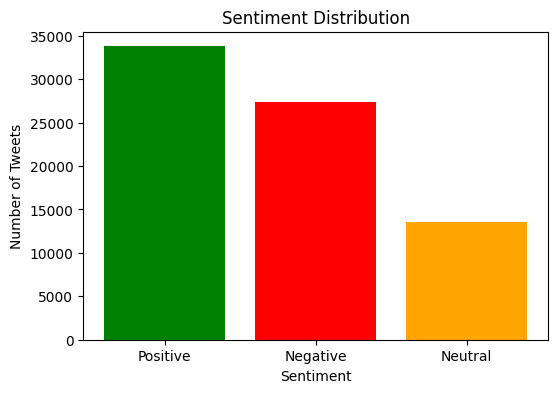

In [28]:
# Count plot of sentiments
counts = df['Predicted_Sentiment'].value_counts()
colors = ['green', 'red', 'orange']
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=colors)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

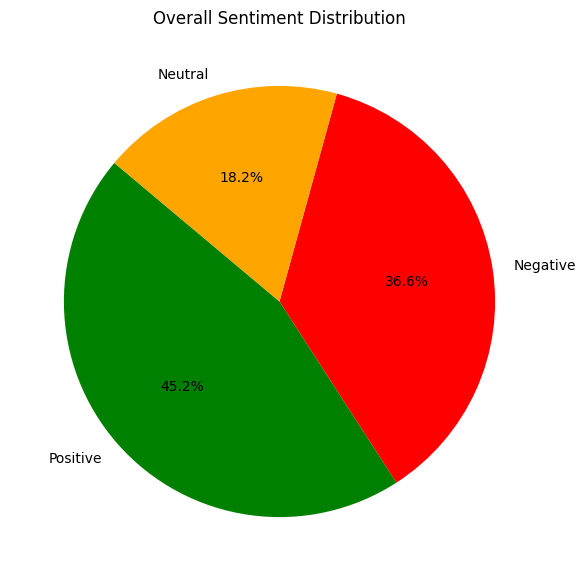

In [42]:
# Pie chart for overall sentiment distribution
sentiment_counts = df['Predicted_Sentiment'].value_counts()
plt.figure(figsize=(7,7))
colors = ['green', 'red', 'orange']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Overall Sentiment Distribution")
plt.show()


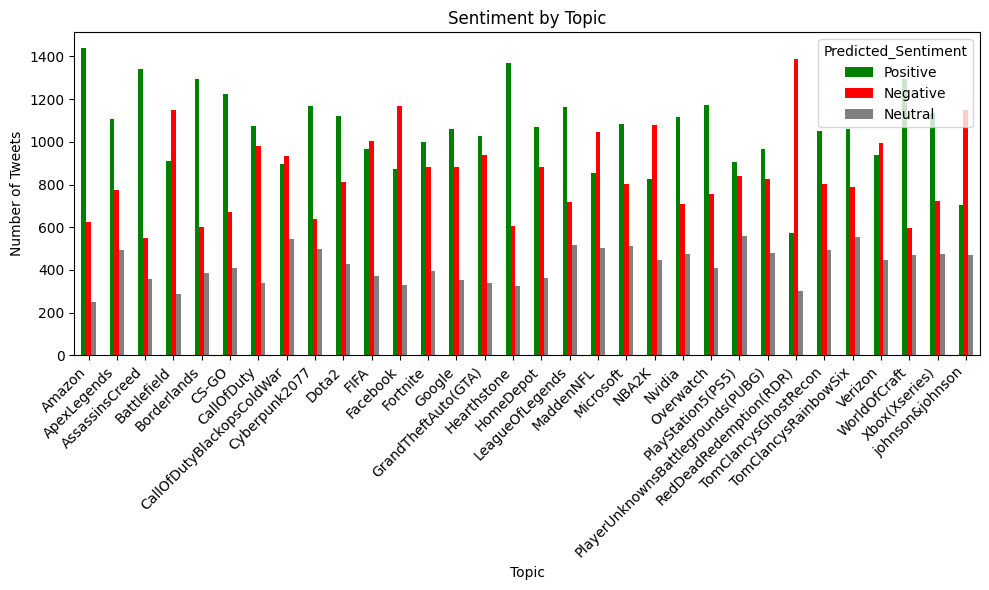

In [45]:
# Sentiment distribution per topic
sentiment_by_topic = df.groupby(['Topic', 'Predicted_Sentiment']).size().unstack(fill_value=0)
sentiment_by_topic = sentiment_by_topic[['Positive', 'Negative', 'Neutral']]
sentiment_by_topic.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red', 'grey'])
plt.title("Sentiment by Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()